# Events Template

## Environment Setup and Import

In [ ]:
import os
print(os.getcwd())
!pip install --quiet --no-input -r ../../requirements.txt --log ./pip-installations.log

In [2]:
# Standard Libraries
from collections import Counter
from pathlib import Path
from pprint import pprint
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt
import datetime
# 3rd-party Libraries
from OGDUtils.general.fileio import FileAPI, FileTypes

#### Change pandas `max_rows` and `max_columns`

In [3]:
pd.options.display.max_columns = 4000 #@param {type:"integer"}
pd.options.display.max_rows = 60 #@param {type:"integer"}

## Data Import

#### Please change the settings below to configure which game/server location you want to use.

<!-- `ogd_server` : The file server that contains the actual data files -->
* `game_id` : The game whose data you want to access.
* `mode` : The kind of data you want to retrieve. Should be one of `FileTypes.PLAYER`, `FileTypes.POPULATION`, `FileTypes.SESSION`, `FileTypes.EVENTS` or `FileTypes.ALL_EVENTS`

In [4]:
game_id = 'AQUALAB'
mode    = FileTypes.EVENTS

In [5]:
months_list = FileAPI.GetAvailableMonths(game_id)
print(f"The available months are:")
pprint(months_list, compact=True)

The available months are:
['4/2021', '5/2021', '6/2021', '7/2021', '8/2021', '9/2021', '10/2021',
 '11/2021', '12/2021', '1/2022', '2/2022', '3/2022', '4/2022', '5/2022',
 '6/2022', '7/2022', '8/2022', '9/2022', '10/2022', '11/2022', '12/2022',
 '1/2023', '2/2023', '3/2023', '4/2023', '5/2023', '6/2023']


In [6]:
month = 2
year = 2023

# download the file if it doesn't exist.
zip_file, dataset_name = FileAPI.DownloadZippedDataset(game_id, month, year, mode)

Found the file AQUALAB_20230201_to_20230228_5de1a1f_events.zip locally, nothing will be downloaded.


In [7]:
zip_name = zip_file.filename
print(zip_name)

AQUALAB_20230201_to_20230228_5de1a1f_events.zip


#### Import Data Files to Jupyter

In [8]:
raw_data = pd.DataFrame()

# Open TSV from the zip file.
MAX_ROWS = 10000 # for the sake of not overwhelming RAM, only read first 10,000 rows of an events file
tsv_name = f"{zip_name[:zip_name.rfind('.')]}.tsv"
with zip_file.open(f"{dataset_name}/{tsv_name}") as tsv_file:
    raw_data = pd.read_csv(tsv_file, sep='\t', nrows=MAX_ROWS)
    data_readme = zip_file.read(f"{dataset_name}/readme.md")
zip_file.close()

In [9]:
# raw_df = pd.read_csv('AQUALAB_20230201_to_20230228_5de1a1f.csv')
raw_df = raw_data
raw_df

,session_id,app_id,timestamp,event_name,event_data,event_source,app_version,app_branch,log_version,offset,user_id,user_data,game_state,index
0,1675696545,AQUALAB,2023-02-06 15:17:17,room_changed,"{""app_flavor"": {""double_value"": null, ""float_v...",GAME,None,None,3,None,AbsorbedComma,{},{},1
1,1675696545,AQUALAB,2023-02-06 15:17:22,scene_changed,"{""app_flavor"": {""double_value"": null, ""float_v...",GAME,None,None,3,None,AbsorbedComma,{},{},2
2,1675696545,AQUALAB,2023-02-06 15:17:22,switch_job,"{""app_flavor"": {""double_value"": null, ""float_v...",GAME,None,None,3,None,AbsorbedComma,{},{},3
3,1675696545,AQUALAB,2023-02-06 15:17:28,open_status,"{""app_flavor"": {""double_value"": null, ""float_v...",GAME,None,None,3,None,AbsorbedComma,{},{},4
4,1675696545,AQUALAB,2023-02-06 15:17:28,status_open_job_tab,"{""app_flavor"": {""double_value"": null, ""float_v...",GAME,None,None,3,None,AbsorbedComma,{},{},5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1677017606,AQUALAB,2023-02-21 23:48:15,begin_experiment,"{""app_flavor"": {""double_value"": null, ""float_v...",GAME,None,None,3,None,AdhesivePool,{},{},1620
9996,1677017606,AQUALAB,2023-02-21 23:48:24,upgrade_fact,"{""app_flavor"": {""double_value"": null, ""float_v...",GAME,None,None,3,None,AdhesivePool,{},{},1621
9997,1677017606,AQUALAB,2023-02-21 23:48:35,script_fired,"{""app_flavor"": {""double_value"": null, ""float_v...",GAME,None,None,3,None,AdhesivePool,{},{},1622
9998,1677017606,AQUALAB,2023-02-21 23:48:35,end_experiment,"{""app_flavor"": {""double_value"": null, ""float_v...",GAME,None,None,3,None,AdhesivePool,{},{},1623


## Data Transforms

### Convert 'timestamp' to datetime

In [10]:
for i in range(len(raw_df)):
    if raw_df['timestamp'][i] != 0:
        raw_df['timestamp'][i] = datetime.datetime.strptime(raw_df['timestamp'][i], '%Y-%m-%d %H:%M:%S')



C:\Users\subsc\AppData\Local\Temp\ipykernel_28684\4125033176.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df['timestamp'][i] = datetime.datetime.strptime(raw_df['timestamp'][i], '%Y-%m-%d %H:%M:%S')


## Data Visualization

#### dataframe and visualization of time spent for a session

In [11]:
first_last_df = raw_df.groupby("session_id").agg({"timestamp": ["first", "last"]})

# flatten the column index
first_last_df.columns = ["_".join(col) for col in first_last_df.columns]
first_last_df = first_last_df.reset_index()
first_last_df["time_diff"] = first_last_df["timestamp_last"] - first_last_df["timestamp_first"]
first_last_df

,session_id,timestamp_first,timestamp_last,time_diff
0,1675262962,2023-02-01 14:50:30,2023-02-01 15:11:06,0 days 00:20:36
1,1675443645,2023-02-03 17:01:18,2023-02-03 17:03:10,0 days 00:01:52
2,1675635046,2023-02-05 22:11:32,2023-02-05 22:20:40,0 days 00:09:08
3,1675696545,2023-02-06 15:17:17,2023-02-06 16:37:27,0 days 01:20:10
4,1675698119,2023-02-06 15:42:42,2023-02-06 15:54:22,0 days 00:11:40
5,1675699260,2023-02-06 16:01:45,2023-02-06 16:33:17,0 days 00:31:32
6,1675710560,2023-02-06 19:09:39,2023-02-06 19:48:06,0 days 00:38:27
7,1676575863,2023-02-16 19:31:38,2023-02-16 19:43:51,0 days 00:12:13
8,1676646310,2023-02-17 15:06:31,2023-02-17 15:49:22,0 days 00:42:51
9,1676657739,2023-02-17 18:16:30,2023-02-17 18:38:36,0 days 00:22:06


In [12]:
first_last_df = raw_df.groupby("user_id").agg({"timestamp": ["first", "last"]})

# flatten the column index
first_last_df.columns = ["_".join(col) for col in first_last_df.columns]
first_last_df = first_last_df.reset_index()
first_last_df["time_diff"] = first_last_df["timestamp_last"] - first_last_df["timestamp_first"]
first_last_df

,user_id,timestamp_first,timestamp_last,time_diff
0,AbsorbedComma,2023-02-06 15:17:17,2023-02-06 16:37:27,0 days 01:20:10
1,AbsorbedForest,2023-02-05 22:11:32,2023-02-05 22:20:40,0 days 00:09:08
2,AbsorbedSound,2023-02-06 15:42:42,2023-02-06 15:54:22,0 days 00:11:40
3,AbstractBrow,2023-02-16 19:31:38,2023-02-21 18:57:11,4 days 23:25:33
4,AchingPecan,2023-02-21 19:33:19,2023-02-26 20:35:33,5 days 01:02:14
5,AchingStump,2023-02-18 06:17:25,2023-02-26 05:12:22,7 days 22:54:57
6,AcousticWing,2023-02-06 16:01:45,2023-02-06 16:33:17,0 days 00:31:32
7,AdamantTitle,2023-02-03 17:01:18,2023-02-03 17:03:10,0 days 00:01:52
8,AdaptiveDory,2023-02-17 18:16:30,2023-02-17 18:38:36,0 days 00:22:06
9,AdeptFormer,2023-02-01 14:50:30,2023-02-01 15:11:06,0 days 00:20:36


<Axes: xlabel='time', ylabel='day_of_week'>

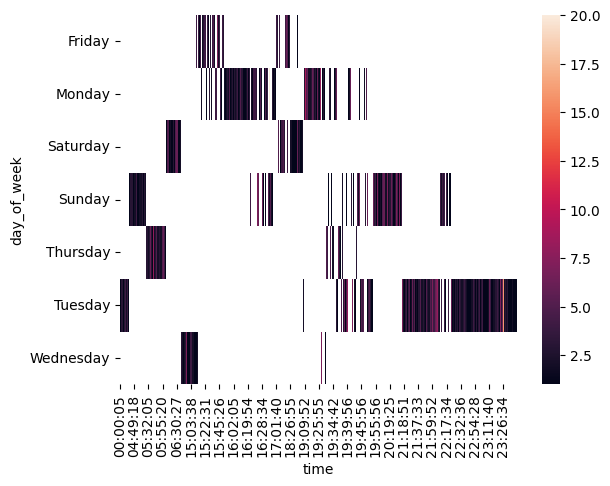

In [13]:
raw_df['timestamp'] = pd.to_datetime(raw_df['timestamp'])
raw_df['day_of_week'] = raw_df['timestamp'].dt.day_name()
raw_df['time'] = raw_df['timestamp'].dt.time

# Create a pivot table to count the number of events by day of the week and time
pivot_table = raw_df.pivot_table(index='day_of_week', columns='time', values='event_name', aggfunc='count')

# Plot the pivot table as a heatmap
import seaborn as sns
sns.heatmap(pivot_table)

C:\Users\subsc\AppData\Local\Temp\ipykernel_28684\2794537586.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


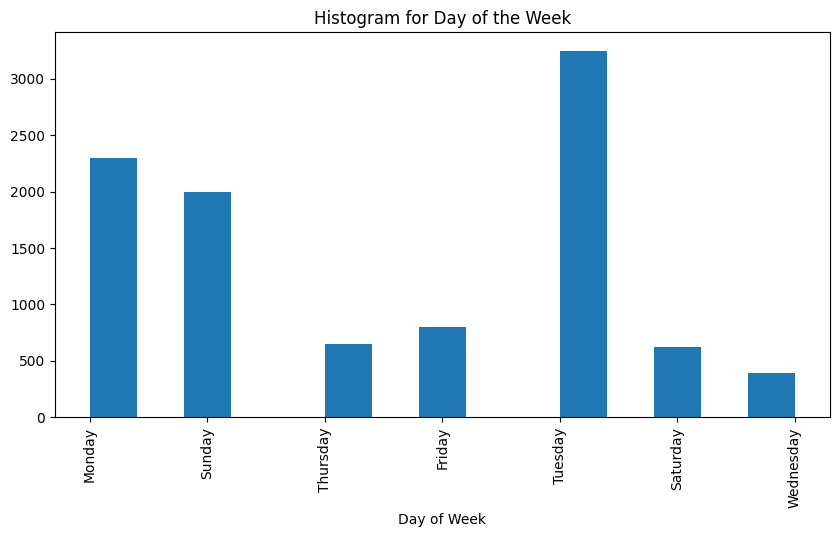

In [16]:
#jobs completed
f, ax = plt.subplots(figsize=(10, 5))
ax.hist(raw_df['day_of_week'], bins=15)
ax.set_xlabel("Day of Week")
ax.set_title("Histogram for Day of the Week")
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 90-degrees
f.show()


C:\Users\subsc\AppData\Local\Temp\ipykernel_28684\3126139862.py:1: FutureWarning: The behavior of fillna with timedelta64[ns] dtype and an incompatible value (<class 'int'>) is deprecated. In a future version, this will cast to a common dtype (usually object) instead of raising, matching the behavior of other dtypes.
  first_last_df.plot(kind="bar", x="user_id", y="time_diff")


TypeError: value should be a 'Timedelta', 'NaT', or array of those. Got 'int' instead.

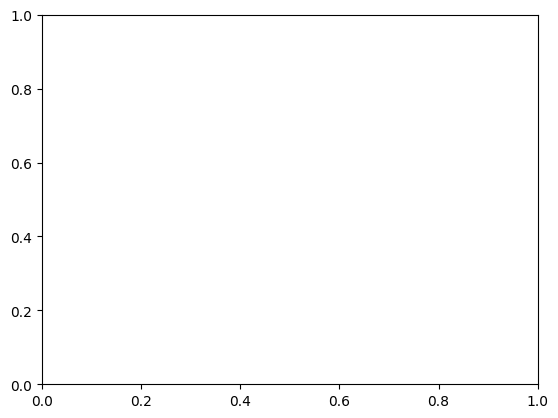

In [17]:
first_last_df.plot(kind="bar", x="user_id", y="time_diff")
plt.xlabel("User ID")
plt.ylabel("Time Difference (Days)")
plt.title("Time Difference between First and Last Timestamp for Each User")

#### Groupby each user

In [ ]:
raw_df.groupby('user_id').count()


,Unnamed: 0,session_id,app_id,timestamp,event_name,event_data,event_source,app_version,app_branch,log_version,offset,user_data,game_state,index,day_of_week,time
user_id,,,,,,,,,,,,,,,,
AbsorbedComma,827,827,827,827,827,827,827,0,56,827,0,827,827,827,827,827
AbsorbedForest,146,146,146,146,146,146,146,0,3,146,0,146,146,146,146,146
AbsorbedSound,199,199,199,199,199,199,199,0,7,199,0,199,199,199,199,199
AbstractBrow,682,682,682,682,682,682,682,0,64,682,0,682,682,682,682,682
AchingPecan,2944,2944,2944,2944,2944,2944,2944,0,189,2944,0,2944,2944,2944,2944,2944
AchingStump,125,125,125,125,125,125,125,0,9,125,0,125,125,125,125,125


#### Groupby session id

In [ ]:
raw_df.groupby('session_id').count()


,Unnamed: 0,app_id,timestamp,event_name,event_data,event_source,app_version,app_branch,log_version,offset,user_id,user_data,game_state,index,day_of_week,time
session_id,,,,,,,,,,,,,,,,
1675635046,146,146,146,146,146,146,0,3,146,0,146,146,146,146,146,146
1675696545,827,827,827,827,827,827,0,56,827,0,827,827,827,827,827,827
1675698119,199,199,199,199,199,199,0,7,199,0,199,199,199,199,199,199
1676575863,169,169,169,169,169,169,0,15,169,0,169,169,169,169,169,169
1676646310,488,488,488,488,488,488,0,42,488,0,488,488,488,488,488,488
1676700987,125,125,125,125,125,125,0,9,125,0,125,125,125,125,125,125
1677004363,25,25,25,25,25,25,0,7,25,0,25,25,25,25,25,25
1677007956,461,461,461,461,461,461,0,23,461,0,461,461,461,461,461,461
1677014123,1007,1007,1007,1007,1007,1007,0,77,1007,0,1007,1007,1007,1007,1007,1007


### Visualize of events counter

In [1]:
#jobs completed
f, ax = plt.subplots(figsize=(10, 5))
ax.hist(raw_df['event_name'], bins=200)
ax.set_xlabel("Event Type")
ax.set_title("Histogram for Type of Events")
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 90-degrees
f.show()


NameError: name 'plt' is not defined

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '1675696545'),
  Text(1, 0, 'Not Implemented'),
  Text(2, 0, '1675635046'),
  Text(3, 0, '1675698119'),
  Text(4, 0, '1676575863'),
  Text(5, 0, '1676646310'),
  Text(6, 0, '1677004363'),
  Text(7, 0, '1677007956'),
  Text(8, 0, '1677014123'),
  Text(9, 0, '1677428245'),
  Text(10, 0, '1677439900'),
  Text(11, 0, '1676700987')])

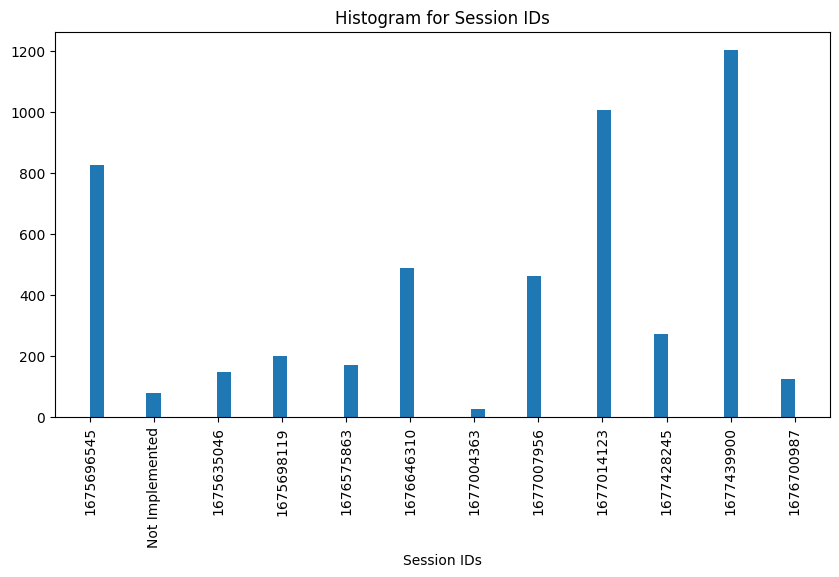

In [21]:
#jobs completed
f, ax = plt.subplots(figsize=(10, 5))
ax.hist(raw_df['session_id'], bins=50)
ax.set_xlabel("Session IDs")
ax.set_title("Histogram for Session IDs")
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees

Text(0.5, 0, 'User IDs')

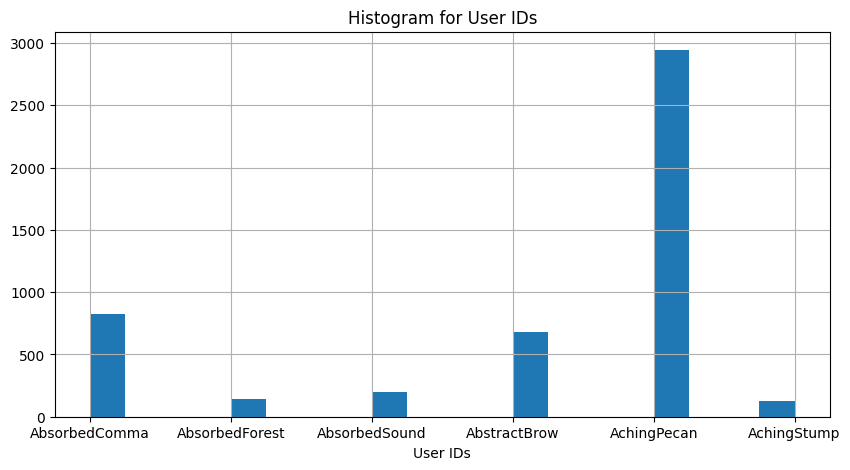

In [22]:
user_ids = list(set(raw_df['user_id']))
fig, ax = plt.subplots(figsize=(10,5))         
raw_df['user_id'].hist(ax=ax, bins= 20)
ax.set_title("Histogram for User IDs")
ax.set_xlabel("User IDs")

